# Newton's Method for Logistic Regression - The Math of Intelligence (Week 2)


![alt text](https://plot.ly/~florianh/140/logistic-regression-1-feature.png "Logo Title Text 1")

## Our Task

We're going to compute the probability that someone has Diabetes given their height, weight, and blood pressure. We'll generate this data ourselves (toy data), plot it, learn a logistic regression curve using Newton's Method for Optimization, then use that curve to predict the probability someone new with these 3 features has diabetes. We'll use Calculus, Probability Theory, Statistics, and Linear Algebra to do this. Get ready, ish is about to go down.

## What is Logistic regression?

Logistic regression is named for the function used at the core of the method, the logistic function. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic Regression is used when response variable is categorical in nature.

The logistic function, also called the sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

![alt text](https://qph.ec.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba "Logo Title Text 1")

Where e is the base of the natural logarithms (Euler’s number or the EXP() function in your spreadsheet) and value is the actual numerical value that you want to transform. E is a really convenient number for math, for example Whenever you take the derivative of e^x (that's e to the x), you get e^x back again.  It's the only function on Earth that will do that.

Logistic regression uses an equation as the representation, similar to linear regression. The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a linear(read: straight) boundary. Your data must be linearly seperable in n dimensions

![alt text](https://codesachin.files.wordpress.com/2015/08/linearly_separable_4.png "Logo Title Text 1")

So if we had the following function

![alt text](https://s0.wp.com/latex.php?latex=%5Cbeta_0+%2B+%5Cbeta_1+x_1+%2B+%5Cbeta_2+x_2&bg=ffffff&fg=555555&s=0&zoom=2 "Logo Title Text 1")

Given some point (a,b), if we plugged it in, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

So  we have a function that outputs a value in (-infinity, +infinity) given an input data point. But how do we map this to the probability P_+, that goes from [0, 1]? The answer, is in the odds function.

![alt text](http://i.imgur.com/bz8XqI8.png "Logo Title Text 1")

Let $P(X)$ denote the probability of an event X occurring. In that case, the odds ratio (OR(X)) is defined by 

![alt text](https://s0.wp.com/latex.php?latex=%5Cfrac%7BP%28X%29%7D%7B1-P%28X%29%7D&bg=ffffff&fg=555555&s=0&zoom=2 "Logo Title Text 1")

which is essentially the ratio of the probability of the event happening, vs. it not happening. It is clear that probability and odds convey the exact same information. But as $P(X)$ goes from 0 to 1, OR(X) goes from 0 to infinity

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) (discrete) rather than a numeric value (continuous)

![alt text](https://image.slidesharecdn.com/ihcclogisticregression-130728061733-phpapp02/95/logistic-regression-in-casecontrol-study-14-638.jpg?cb=1374992365 "Logo Title Text 1")

However, we are still not quite there yet, since our boundary function gives a value from –infinity to infinity. So what we do, is take the logarithm of OR(X), called the log-odds function. Mathematically, as OR(X) goes from 0 to infinity, log(OR(X)) goes from –infinity to infinity

We are modeling the probability that an input (X) belongs to the default class (Y=1). The probability prediction must be transformed into a binary values (0 or 1) in order to actually make a probability prediction. Logistic regression is a linear method, but the predictions are transformed using the logistic function. The impact of this is that we can no longer understand the predictions as a linear combination of the inputs as we can with linear regression.

Wait, how is the boundary function computed? Well we want to maximize the likelihood that a random data point gets classified correctly. We call this Maximimum likelihood estimation.

Maximum likelihood estimation is a general approach to estimating parameters in statistical models by maximizing the likelihood function. MLE applied to deep networks gets a special name “Backpropagation". MLE is defined as

L(θ|X)=f(X|θ)

Newton's Method is an optimization algorithm. You can use this algorithm to find maximum (or minimum) of many different functions, including the likelihood function. You can obtain maximum likelihood estimates using different methods and using an optimization algorithm is one of them. 

## Why use Newton's Method for optimizing?

- Newton’s method usually converges faster than gradient
descent when maximizing logistic regression log
likelihood.
- Each iteration is more expensive than gradient descent
because of calculating inverse of Hessian
- As long as data points are not very large, Newton’s
methods are preferred

## What are some other good examples of logistic regression + newton's method? 

1 https://github.com/hhl60492/newton_logistic/blob/master/main.py (Spam Classification)
2 https://github.com/yangarbiter/logistic_regression_newton-cg (Click Through Rate Classification)

In [1]:
%matplotlib inline

#matrix math
import numpy as np
#data manipulation
import pandas as pd
#matrix data structure
from patsy import dmatrices
#for error logging
import warnings

<a name="data_setup"></a>
## Setup

### Parameter / Data Setup

In the below cells, there are various parameters and options to play with involving data creation, algorithm settings, and what model you want to try and fit.

In [2]:
#outputs probability between 0 and 1, used to help define our logistic regression curve
def sigmoid(x):
    '''Sigmoid function of x.'''
    return 1/(1+np.exp(-x))

![alt text](http://i.imgur.com/TfPVnME.png "Logo Title Text 1")

In [3]:
#makes the random numbers predictable
#(pseudo-)random numbers work by starting with a number (the seed), 
#multiplying it by a large number, then taking modulo of that product. 
#The resulting number is then used as the seed to generate the next "random" number. 
#When you set the seed (every time), it does the same thing every time, giving you the same numbers.
#good for reproducing results for debugging


np.random.seed(0) # set the seed

##Step 1 - Define model parameters (hyperparameters)

## algorithm settings
#the minimum threshold for the difference between the predicted output and the actual output
#this tells our model when to stop learning, when our prediction capability is good enough
tol=1e-8 # convergence tolerance

lam = None # l2-regularization
#how long to train for?
max_iter = 20 # maximum allowed iterations

## data creation settings
#Covariance measures how two variables move together. 
#It measures whether the two move in the same direction (a positive covariance) 
#or in opposite directions (a negative covariance). 
r = 0.95 # covariance between x and z
n = 10000 # number of observations (size of dataset to generate) 
sigma = 1 # variance of noise - how spread out is the data?

## model settings
beta_x, beta_z, beta_v = -4, .9, 1 # true beta coefficients
var_x, var_z, var_v = 1, 1, 4 # variances of inputs

## the model specification you want to fit
formula = 'y ~ x + z + v + np.exp(x) + I(v**2 + z)'

In [4]:
## Step 2 - Generate and organize our data

#The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal 
#distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix.
#so we generate values input values - (x, v, z) using normal distributions

#A probability distribution is a function that provides us the probabilities of all 
#possible outcomes of a stochastic process. 

#lets keep x and z closely related (height and weight)
x, z = np.random.multivariate_normal([0,0], [[var_x,r],[r,var_z]], n).T
#blood presure
v = np.random.normal(0,var_v,n)**3

#create a pandas dataframe (easily parseable object for manipulation)
A = pd.DataFrame({'x' : x, 'z' : z, 'v' : v})
#compute the log odds for our 3 independent variables
#using the sigmoid function 
A['log_odds'] = sigmoid(A[['x','z','v']].dot([beta_x,beta_z,beta_v]) + sigma*np.random.normal(0,1,n))



#compute the probability sample from binomial distribution
#A binomial random variable is the number of successes x has in n repeated trials of a binomial experiment. 
#The probability distribution of a binomial random variable is called a binomial distribution. 
A['y'] = [np.random.binomial(1,p) for p in A.log_odds]

#create a dataframe that encompasses our input data, model formula, and outputs
y, X = dmatrices(formula, A, return_type='dataframe')

#print it
X.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


,Intercept,x,z,v,np.exp(x),I(v ** 2 + z)
0,1.0,-1.805133,-1.678592,2.300928e+00,0.164453,3.615676e+00
1,1.0,-1.320743,-0.612110,-7.076978e-09,0.266937,-6.121100e-01
2,1.0,-1.689545,-1.998587,3.504487e+01,0.184604,1.226144e+03
3,1.0,-0.914205,-0.962069,5.025296e+00,0.400835,2.429153e+01
4,1.0,0.036999,0.166842,-1.004744e+03,1.037692,1.009511e+06
5,1.0,-0.372172,0.087709,1.119276e-01,0.689235,1.002370e-01
6,1.0,-0.770703,-0.732226,3.374747e+01,0.462688,1.138160e+03
7,1.0,-0.491038,-0.385521,1.397112e+01,0.611991,1.948067e+02
8,1.0,-1.442847,-1.507723,-4.144904e+01,0.236254,1.716515e+03
9,1.0,-0.174085,-0.444174,-2.306638e-01,0.840225,-3.909682e-01


<a name="algorithms"></a>
<hr>
### Algorithm Setup

We begin with a quick function for catching singular matrix errors that we will use to decorate our Newton steps.

In [5]:
#like dividing by zero (Wtff omgggggg universe collapses)
def catch_singularity(f):
    '''Silences LinAlg Errors and throws a warning instead.'''
    
    def silencer(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except np.linalg.LinAlgError:
            warnings.warn('Algorithm terminated - singular Hessian!')
            return args[0]
    return silencer


<a name="newton"></a>
<hr>
### Explanation of a Single Newton Step

Recall that Newton's method for maximizing / minimizing a given function $f(\beta)$ iteratively computes the following estimate:

$$
\beta^+ = \beta - Hf(\beta)^{-1}\nabla f(\beta)
$$

The Hessian of the log-likelihood for logistic regression is given by:

hessian of our function = negative tranpose of (N times (p+1) times (N x N diagional matrix of weights, each is p*(1-p) times X again


$$
Hf(\beta) = -X^TWX
$$
and the gradient is:

gradient of our function = tranpose of X times (column vector - N vector of probabilities)

$$
\nabla f(\beta) = X^T(y-p)
$$
where
$$
W := \text{diag}\left(p(1-p)\right)
$$
and $p$ are the predicted probabilites computed at the current value of $\beta$.

### Connection to Iteratively Reweighted Least Squares (IRLS)
*For logistic regression, this step is actually equivalent to computing a weighted least squares estimator at each iteration!* 
The method of least squares is about estimating
parameters by minimizing the squared discrepancies
between observed data, on the one hand, and their
expected values on the other

I.e.,
$$
\beta^+ = \arg\min_\beta (z-X\beta)^TW(z-X\beta)
$$
with $W$ as before and the *adjusted response* $z$ is given by
$$
z := X\beta + W^{-1}(y-p)
$$

**Takeaway:** This is fun, but in fact it can be leveraged to derive asymptotics and inferential statistics about the computed MLE $\beta^*$!

### Our implementations
Below we implement a single step of Newton's method, and we compute $Hf(\beta)^{-1}\nabla f(\beta)$ using `np.linalg.lstsq(A,b)` to solve the equation $Ax = b$.  Note that this does not require us to compute the actual inverse of the Hessian.

In [6]:
@catch_singularity
def newton_step(curr, X, lam=None):
    '''One naive step of Newton's Method'''
    
    #how to compute inverse? http://www.mathwarehouse.com/algebra/matrix/images/square-matrix/inverse-matrix.gif
    
    ## compute necessary objects
    #create probability matrix, miniminum 2 dimensions, tranpose (flip it)
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    #create weight matrix from it
    W = np.diag((p*(1-p))[:,0])
    #derive the hessian 
    hessian = X.T.dot(W).dot(X)
    #derive the gradient
    grad = X.T.dot(y-p)
    
    ## regularization step (avoiding overfitting)
    if lam:
        # Return the least-squares solution to a linear matrix equation
        step, *_ = np.linalg.lstsq(hessian + lam*np.eye(curr.shape[0]), grad)
    else:
        step, *_ = np.linalg.lstsq(hessian, grad)
        
    ## update our 
    beta = curr + step
    
    return beta

Next, we implement Newton's method in a *slightly* different way; this time, at each iteration, we actually compute the full inverse of the Hessian using `np.linalg.inv()`.

In [7]:
@catch_singularity
def alt_newton_step(curr, X, lam=None):
    '''One naive step of Newton's Method'''
    
    ## compute necessary objects
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    W = np.diag((p*(1-p))[:,0])
    hessian = X.T.dot(W).dot(X)
    grad = X.T.dot(y-p)
    
    ## regularization
    if lam:
        #Compute the inverse of a matrix.
        step = np.dot(np.linalg.inv(hessian + lam*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)
        
    ## update our weights
    beta = curr + step
    
    return beta

<a name="conv"></a>
<hr>
### Convergence Setup

First we implement coefficient convergence; this stopping criterion results in convergence whenever
$$
\|\beta^+ - \beta\|_\infty < \epsilon
$$
where $\epsilon$ is a given tolerance.

In [8]:
def check_coefs_convergence(beta_old, beta_new, tol, iters):
    '''Checks whether the coefficients have converged in the l-infinity norm.
    Returns True if they have converged, False otherwise.'''
    #calculate the change in the coefficients
    coef_change = np.abs(beta_old - beta_new)
    
    #if change hasn't reached the threshold and we have more iterations to go, keep training
    return not (np.any(coef_change>tol) & (iters < max_iter))

<a name="numerics"></a>
<hr>
## Numerical Examples

### Standard Newton with Coefficient Convergence

In [9]:
## initial conditions
#initial coefficients (weight values), 2 copies, we'll update one
beta_old, beta = np.ones((len(X.columns),1)), np.zeros((len(X.columns),1))

#num iterations we've done so far
iter_count = 0
#have we reached convergence?
coefs_converged = False

#if we haven't reached convergence... (training step)
while not coefs_converged:
    
    #set the old coefficients to our current
    beta_old = beta
    #perform a single step of newton's optimization on our data, set our updated beta values
    beta = newton_step(beta, X, lam=lam)
    #increment the number of iterations
    iter_count += 1
    
    #check for convergence between our old and new beta values
    coefs_converged = check_coefs_convergence(beta_old, beta, tol, iter_count)
    
print('Iterations : {}'.format(iter_count))
print('Beta : {}'.format(beta))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Iterations : 17
Beta : [[-1.05374078e-01]
 [-3.49588743e+00]
 [ 8.29876514e-01]
 [ 8.81750468e-01]
 [ 6.48141450e-02]
 [ 1.35820204e-04]]


# Plotting logistic curve

In [10]:
# Libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline

## Inputs

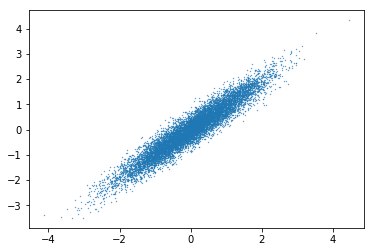

In [11]:
# values of x and z (height and weight)
plt.scatter(x,z,s=0.1)
plt.show()

## Curve for seperation

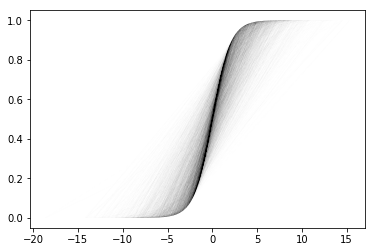

In [12]:
import math

def curve(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

import matplotlib.pyplot as plt
import numpy as np

curv = curve(np.cbrt(v))
plt.plot(np.cbrt(v),curv,linewidth=0.002,color='black')

## Plotting them together

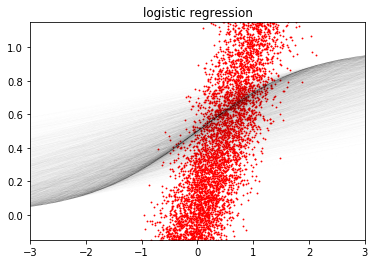

In [13]:
# values of x and z (height and weight)
plt.scatter(x,z,s=0.7,color='red')
plt.plot(np.cbrt(v),curv,linewidth=0.002,color='black')
plt.axis([-3,3,-0.15,1.15])
plt.title("logistic regression")
plt.savefig("logistic regression.jpg")